# Using Machine Learning to Identify Photons

## Importing Data

In [1]:
import uproot
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
filespath="/data/mhance/photons/NTUP_ZLLG/"
filename = [
'mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.DAOD_EGAM3.e3601_e5984_s3126_r10724_r10726_p3954.root',
'mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.DAOD_EGAM4.e3601_e5984_s3126_r10724_r10726_p3954.root']#,
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_140_E_CMS.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_15_35.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_35_70.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_70_140.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_eegamma_LO_pty_7_15.DAOD_EGAM3.e7006_e5984_s3126_r10724_r10726_p3956.root']#,
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_7_15.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_140_E_CMS.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_15_35.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_35_70.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root',
# 'mc16e_13TeV/00-03-01/mc16e.Sh_224_NN30NNLO_mumugamma_LO_pty_70_140.DAOD_EGAM4.e7006_e5984_s3126_r10724_r10726_p3956.root'
]
treename = "output"
full_path = [f"{filespath}{file}" for file in filename]
expressions_for_batch = ['ph.pt','ph.eta','ph.rhad','ph.rhad1','ph.reta','ph.rphi','ph.weta2','ph.eratio','ph.deltae','ph.wstot','ph.fside','ph.w1','ph.truth_pdgId','ph.truth_type','ph.convFlag']

data = []
for file_path in full_path:
    print(f"Processing file: {file_path}")
    with uproot.open(file_path) as events:
        for batch_unscattered in events[treename].iterate(expressions=expressions_for_batch,step_size='10 MB'):
            # print('.')
            data.append(ak.from_iter(batch_unscattered))
data = ak.concatenate(data)

Processing file: /data/mhance/photons/NTUP_ZLLG/mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.DAOD_EGAM3.e3601_e5984_s3126_r10724_r10726_p3954.root
Processing file: /data/mhance/photons/NTUP_ZLLG/mc16e_13TeV/00-03-01/mc16e.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.DAOD_EGAM4.e3601_e5984_s3126_r10724_r10726_p3954.root


In [3]:
datalist=['ph.pt','ph.eta','ph.rhad','ph.rhad1','ph.reta','ph.rphi','ph.weta2','ph.eratio','ph.deltae','ph.wstot','ph.fside','ph.w1','ph.truth_pdgId','ph.truth_type','ph.convFlag']
for i in datalist:
    print(i,len(data[i]),type(data[i]))

ph.pt 9011980 <class 'awkward.highlevel.Array'>
ph.eta 9011980 <class 'awkward.highlevel.Array'>
ph.rhad 9011980 <class 'awkward.highlevel.Array'>
ph.rhad1 9011980 <class 'awkward.highlevel.Array'>
ph.reta 9011980 <class 'awkward.highlevel.Array'>
ph.rphi 9011980 <class 'awkward.highlevel.Array'>
ph.weta2 9011980 <class 'awkward.highlevel.Array'>
ph.eratio 9011980 <class 'awkward.highlevel.Array'>
ph.deltae 9011980 <class 'awkward.highlevel.Array'>
ph.wstot 9011980 <class 'awkward.highlevel.Array'>
ph.fside 9011980 <class 'awkward.highlevel.Array'>
ph.w1 9011980 <class 'awkward.highlevel.Array'>
ph.truth_pdgId 9011980 <class 'awkward.highlevel.Array'>
ph.truth_type 9011980 <class 'awkward.highlevel.Array'>
ph.convFlag 9011980 <class 'awkward.highlevel.Array'>


## Photons We are Interested in

In [4]:
mask = (data['ph.pt'] >= 15000) & (data['ph.pt'] < 20000) & (abs(data['ph.eta']) < 0.8) & (data['ph.wstot'] >= 0) & (data['ph.w1'] >= 0)

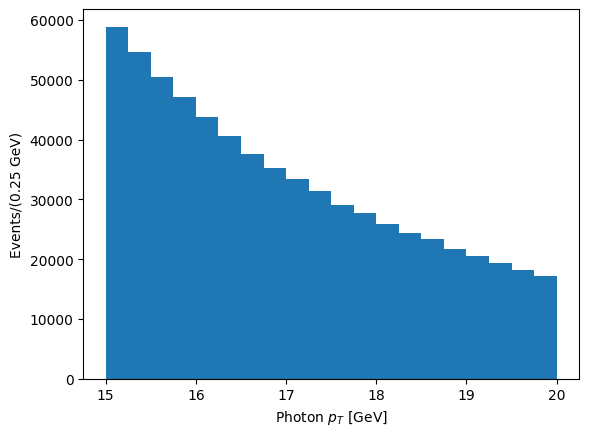

In [5]:
myrange_pt = (15,20)
nbins_pt=20
binwidth_pt=(myrange_pt[1]-myrange_pt[0])/nbins_pt
plt.hist(((data['ph.pt'])/1000)[mask],bins=nbins_pt,range=myrange_pt)
plt.xlabel("Photon $p_{T}$ [GeV]")
plt.ylabel(f"Events/({binwidth_pt} GeV)")
plt.show()

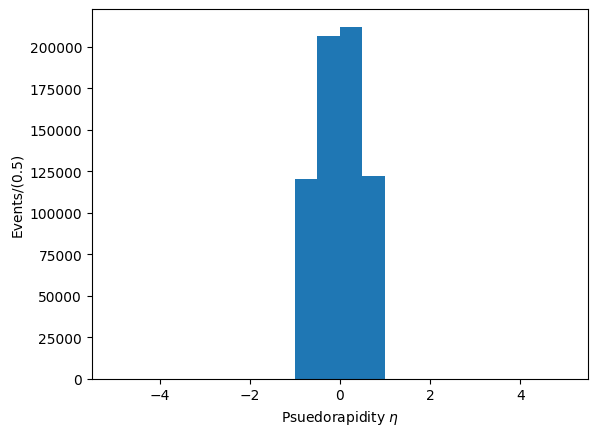

In [6]:
nbins_eta=20
myrange_eta=(-5,5)
binwidth_eta=(myrange_eta[1]-myrange_eta[0])/nbins_eta
plt.hist(data["ph.eta"][mask],bins=nbins_eta,range=myrange_eta)
plt.xlabel("Psuedorapidity $\eta$")
plt.ylabel(f"Events/({binwidth_eta})")
plt.show()

## Converting Data from Awkward Arrays

In [7]:
import numpy as np
import awkward as ak

numpy_data = {}

for i in datalist:
    numpy_array = ak.to_numpy(data[i][mask])
    numpy_data[i] = numpy_array
    print(i,len(numpy_array),type(numpy_array))

data = numpy_data

ph.pt 661108 <class 'numpy.ndarray'>
ph.eta 661108 <class 'numpy.ndarray'>
ph.rhad 661108 <class 'numpy.ndarray'>
ph.rhad1 661108 <class 'numpy.ndarray'>
ph.reta 661108 <class 'numpy.ndarray'>
ph.rphi 661108 <class 'numpy.ndarray'>
ph.weta2 661108 <class 'numpy.ndarray'>
ph.eratio 661108 <class 'numpy.ndarray'>
ph.deltae 661108 <class 'numpy.ndarray'>
ph.wstot 661108 <class 'numpy.ndarray'>
ph.fside 661108 <class 'numpy.ndarray'>
ph.w1 661108 <class 'numpy.ndarray'>
ph.truth_pdgId 661108 <class 'numpy.ndarray'>
ph.truth_type 661108 <class 'numpy.ndarray'>
ph.convFlag 661108 <class 'numpy.ndarray'>


In [8]:
datalist = ['ph.pt','ph.eta','ph.rhad1','ph.reta','ph.rphi','ph.weta2','ph.eratio','ph.deltae','ph.wstot','ph.fside','ph.w1','ph.truth_pdgId','ph.truth_type','ph.convFlag']

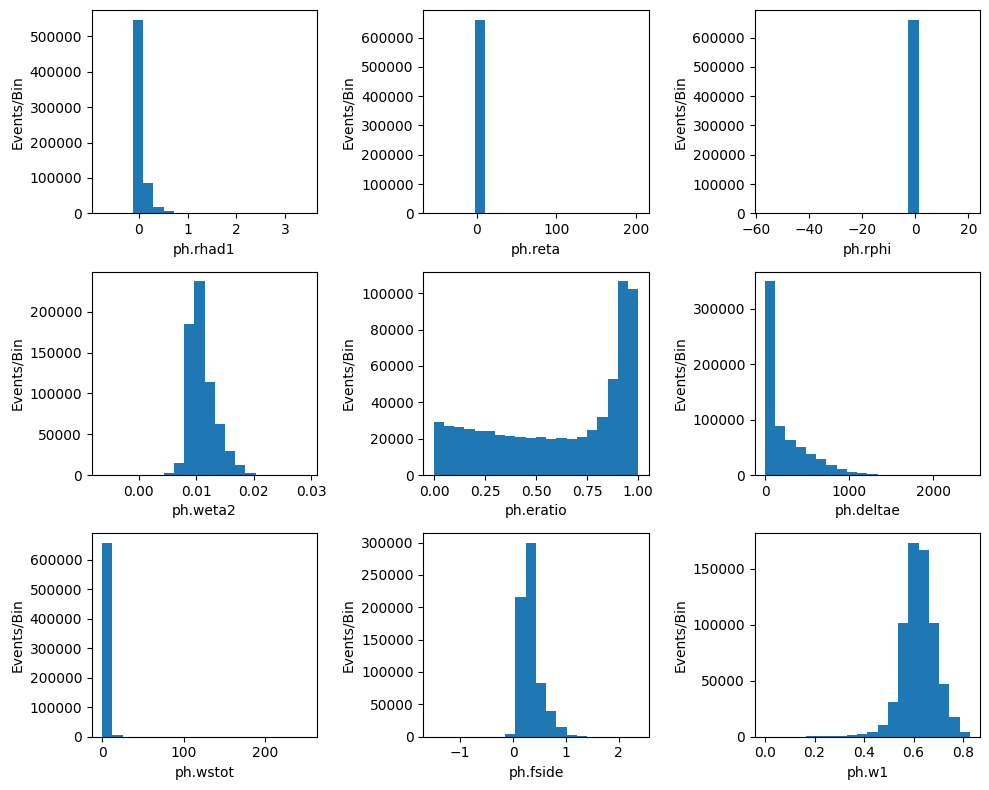

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

nbins = 20
for i, ax in enumerate(axes.flatten()):
    ax.hist(data[datalist[i+2]], bins=nbins)
    ax.set_xlabel(datalist[i+2])
    ax.set_ylabel("Events/Bin")
fig.tight_layout()

### Preselection of True Conv Photons

In [10]:
import torch

print(data['ph.truth_pdgId'],data['ph.truth_type'])
loosetrues = []
for i in range(len(data['ph.pt'])):
    if data['ph.truth_pdgId'][i] == 22 and data['ph.truth_type'][i]==15 or data['ph.truth_type'][i]==13 or data['ph.truth_type'][i]==14:
        true = 1
    else:
        true = 0
    loosetrues.append(true)
loosetrues = torch.Tensor(loosetrues)
print(len(loosetrues))

[ 0  0 22 ... 22 22 22] [-999 -999   16 ...   16   15   16]
661108


In [11]:
print(np.sum(loosetrues.detach().numpy())/len(loosetrues.detach().numpy()))

0.25640591249841177


In [12]:
truedata = {}
for i in range(0,11):
    truelist = []
    for j in range(0,len(data['ph.pt'])):
        if loosetrues[j] == 1:
            truelist.append(data[datalist[i]][j])
    # truelist = torch.Tensor(truelist)
    print(i+1,datalist[i],len(truelist),type(truelist))
    truedata[i] = truelist

1 ph.pt 169512 <class 'list'>
2 ph.eta 169512 <class 'list'>
3 ph.rhad1 169512 <class 'list'>
4 ph.reta 169512 <class 'list'>
5 ph.rphi 169512 <class 'list'>
6 ph.weta2 169512 <class 'list'>
7 ph.eratio 169512 <class 'list'>
8 ph.deltae 169512 <class 'list'>
9 ph.wstot 169512 <class 'list'>
10 ph.fside 169512 <class 'list'>
11 ph.w1 169512 <class 'list'>


In [13]:
falsedata = {}
for i in range(0,11):
    falselist = []
    for j in range(0,len(data['ph.pt'])):
        if loosetrues[j] == 0:
            falselist.append(data[datalist[i]][j])
    # falselist = torch.Tensor(truelist)
    print(i+1,datalist[i],len(falselist),type(falselist))
    falsedata[i] = falselist

1 ph.pt 491596 <class 'list'>
2 ph.eta 491596 <class 'list'>
3 ph.rhad1 491596 <class 'list'>
4 ph.reta 491596 <class 'list'>
5 ph.rphi 491596 <class 'list'>
6 ph.weta2 491596 <class 'list'>
7 ph.eratio 491596 <class 'list'>
8 ph.deltae 491596 <class 'list'>
9 ph.wstot 491596 <class 'list'>
10 ph.fside 491596 <class 'list'>
11 ph.w1 491596 <class 'list'>


### Plotting True Vs Untrue Features for Conv

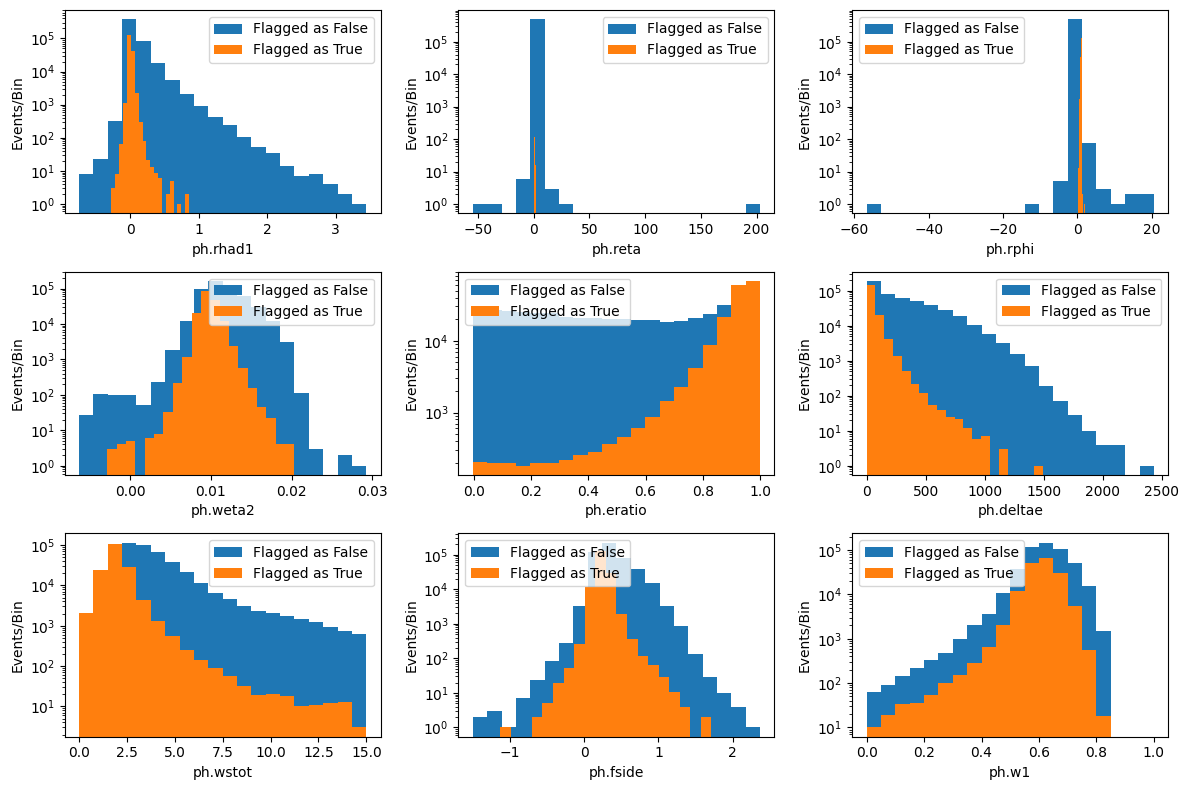

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
# ranges = [(0,1),(
nbins = 20
for i, ax in enumerate(axes.flatten()):
    ax.hist(falsedata[i+2], bins=nbins, range = (0,1) if i == 8 else (0,15) if i == 6 else None, label = 'Flagged as False')
    ax.hist(truedata[i+2], bins=nbins, range = (0,1) if i == 8 else (0,15) if i == 6 else None, label = 'Flagged as True')
    ax.set_xlabel(datalist[i+2])
    ax.set_ylabel("Events/Bin")
    ax.legend()
    ax.set_yscale('log')
fig.tight_layout()

### Building Network

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

import torch
import torch.nn
import torch.optim
import torch.utils.data

import time
import math

In [16]:
import importlib
import LearningCutsUtils.LearningCutsUtils
## needed if we change LearningCutsUtils and want to avoid reloading the kernel to see the effects
importlib.reload(LearningCutsUtils.LearningCutsUtils)
import LearningCutsUtils.LearningCutsUtils as LCU
from LearningCutsUtils.LearningCutsUtils import getBack, ListToGraph, OneToOneLinear, EfficiencyScanNetwork
from LearningCutsUtils.LearningCutsUtils import loss_fn
from LearningCutsUtils.LearningCutsUtils import effic_loss_fn

In [17]:
x_train_list = []

for i in range(2,11):
    x_train_array = torch.from_numpy(data[datalist[i]])
    x_train_list.append(x_train_array)
    print(i-1,datalist[i], len(x_train_array), type(x_train_array))

x_train_tensor = torch.stack(x_train_list)

print(x_train_tensor.shape,x_train_tensor.dtype,type(x_train_tensor))


1 ph.rhad1 661108 <class 'torch.Tensor'>
2 ph.reta 661108 <class 'torch.Tensor'>
3 ph.rphi 661108 <class 'torch.Tensor'>
4 ph.weta2 661108 <class 'torch.Tensor'>
5 ph.eratio 661108 <class 'torch.Tensor'>
6 ph.deltae 661108 <class 'torch.Tensor'>
7 ph.wstot 661108 <class 'torch.Tensor'>
8 ph.fside 661108 <class 'torch.Tensor'>
9 ph.w1 661108 <class 'torch.Tensor'>
torch.Size([9, 661108]) torch.float64 <class 'torch.Tensor'>


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train_tensor.T, loosetrues, test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

x_train_tensor = torch.tensor(X_train, dtype=torch.float).detach()
y_train_tensor=torch.tensor(y_train,dtype=torch.float)

x_test_tensor = torch.tensor(X_test, dtype=torch.float).detach()
y_test_tensor=torch.tensor(y_test,dtype=torch.float)

/tmp/ipykernel_1926/4240866220.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor=torch.tensor(y_train,dtype=torch.float)
/tmp/ipykernel_1926/4240866220.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor=torch.tensor(y_test,dtype=torch.float)


In [20]:
import importlib
import LearningCutsUtils.LearningCutsUtils
## needed if we change LearningCutsUtils and want to avoid reloading the kernel to see the effects
importlib.reload(LearningCutsUtils.LearningCutsUtils)
import LearningCutsUtils.LearningCutsUtils as LCU
from LearningCutsUtils.LearningCutsUtils import getBack, ListToGraph, OneToOneLinear, EfficiencyScanNetwork
from LearningCutsUtils.LearningCutsUtils import loss_fn
from LearningCutsUtils.LearningCutsUtils import effic_loss_fn

In [21]:
N=len(loosetrues) # number of points
m=9 # dimensions


In [22]:
gt=1.
lt=-1.
cuts_gt_lt = [lt, gt, gt, lt, gt, ### change these to correct cuts
              lt, lt, lt, lt] # l g g l g l l l l 

In [23]:
targeteffics=[0.6,0.7,0.8,0.9]

# some hyperparameters
activation_input_scale_factor=8
learning_rate=0.1
batch_size=int(len(y_train)/1.) # only one batch
epochs=50
alpha=10.   # scaling factor to tune how important hitting the target signal efficiency is
beta=1.     # scaling factor to tune how important background rejection is
gamma=1e-3  # scaling factor for how aggressively to push the cuts to zero
epsilon=1e-2   # how much to penalize deviations

In [24]:

torch.manual_seed(123)

net = EfficiencyScanNetwork(m,targeteffics,cuts_gt_lt,activation_input_scale_factor) # will take m inputs, return m*n_eff outputs
torch.save(net.state_dict(), 'net_learningbiases_effictarget_untrained.pth')

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

In [25]:
device="cpu"
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    device="cuda:0"
print(device)

cpu


In [26]:
losses = []
losses_test = []

net.load_state_dict(torch.load('net_learningbiases_effictarget_untrained.pth',weights_only=True))
xy_train = torch.utils.data.TensorDataset(x_train_tensor.float(),y_train_tensor)
loader = torch.utils.data.DataLoader(xy_train, batch_size=batch_size, shuffle=True)
if torch.cuda.is_available():
    print(net)
    print(np.sum([np.prod(theta.shape) for theta in net.parameters()]))

    net.train()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    losses = []
    losses_test = []

    # we need to send the network and data to the GPU!
    net = net.to(device)
    x_train_tensor=x_train_tensor.to(device)
    y_train_tensor=y_train_tensor.to(device)
    x_test_tensor=x_test_tensor.to(device)
    y_test_tensor=y_test_tensor.to(device)
    xy_train = torch.utils.data.TensorDataset(x_train_tensor.float(),y_train_tensor)
    loader = torch.utils.data.DataLoader(xy_train, batch_size=batch_size, shuffle=True)

debug=False
for epoch in range(epochs):
    net.train()
    start_time = time.time()
    for x_batch, y_batch in loader:
        y_pred = net(x_batch)
        optimizer.zero_grad()
        loss = effic_loss_fn(y_pred, y_batch, m, net, alpha, beta, gamma, epsilon,debug=debug)
        loss.totalloss().backward()
        optimizer.step()
    losses.append(loss)
    net.eval() # configure the model for evaluation (testing)
    y_pred = net(x_test_tensor)
    test_loss = effic_loss_fn(y_pred, y_test_tensor, m, net, alpha, beta, gamma, epsilon)
    losses_test.append(test_loss)
    end_time=time.time()
    elapsed_time = end_time - start_time
    print(f"Completed epoch {epoch:2d} in {elapsed_time:4.1f}s, Train loss={loss.totalloss().data:4.1e}, Test loss={test_loss.totalloss().data:4.1e}")

torch.save(net.state_dict(), 'net_learningbiases_effictarget_trained.pth')

Completed epoch  0 in  9.9s, Train loss=7.0e+00, Test loss=2.8e+00
Completed epoch  1 in  8.1s, Train loss=2.8e+00, Test loss=1.7e+00
Completed epoch  2 in  8.7s, Train loss=1.7e+00, Test loss=1.2e+00
Completed epoch  3 in  7.8s, Train loss=1.2e+00, Test loss=1.0e+00
Completed epoch  4 in  9.1s, Train loss=1.0e+00, Test loss=8.7e-01
Completed epoch  5 in  7.7s, Train loss=8.7e-01, Test loss=7.8e-01
Completed epoch  6 in  8.5s, Train loss=7.8e-01, Test loss=7.3e-01
Completed epoch  7 in  7.3s, Train loss=7.3e-01, Test loss=6.9e-01
Completed epoch  8 in  8.3s, Train loss=6.9e-01, Test loss=6.6e-01
Completed epoch  9 in  7.1s, Train loss=6.6e-01, Test loss=6.4e-01
Completed epoch 10 in  8.4s, Train loss=6.4e-01, Test loss=6.2e-01
Completed epoch 11 in  7.3s, Train loss=6.3e-01, Test loss=6.1e-01
Completed epoch 12 in  8.5s, Train loss=6.1e-01, Test loss=6.0e-01
Completed epoch 13 in  7.5s, Train loss=6.0e-01, Test loss=5.9e-01
Completed epoch 14 in  8.2s, Train loss=5.9e-01, Test loss=5.8

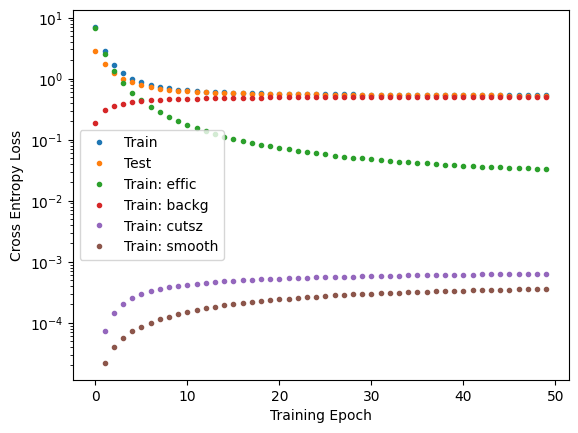

In [27]:
LearningCutsUtils.LearningCutsUtils.plotlosses(losses,losses_test)


In [28]:
for n in range(len(targeteffics)):
    print(f"Target efficiency: {targeteffics[n]*100}%")
    LearningCutsUtils.LearningCutsUtils.check_effic(x_test_tensor,y_test.numpy(),net.nets[n],True)

Target efficiency: 60.0%
Signal Efficiency with net outputs: 68.3%
Background Efficiency with net outputs: 10.14596%
Target efficiency: 70.0%
Signal Efficiency with net outputs: 76.0%
Background Efficiency with net outputs: 12.28991%
Target efficiency: 80.0%
Signal Efficiency with net outputs: 82.9%
Background Efficiency with net outputs: 15.13767%
Target efficiency: 90.0%
Signal Efficiency with net outputs: 88.3%
Background Efficiency with net outputs: 18.72826%


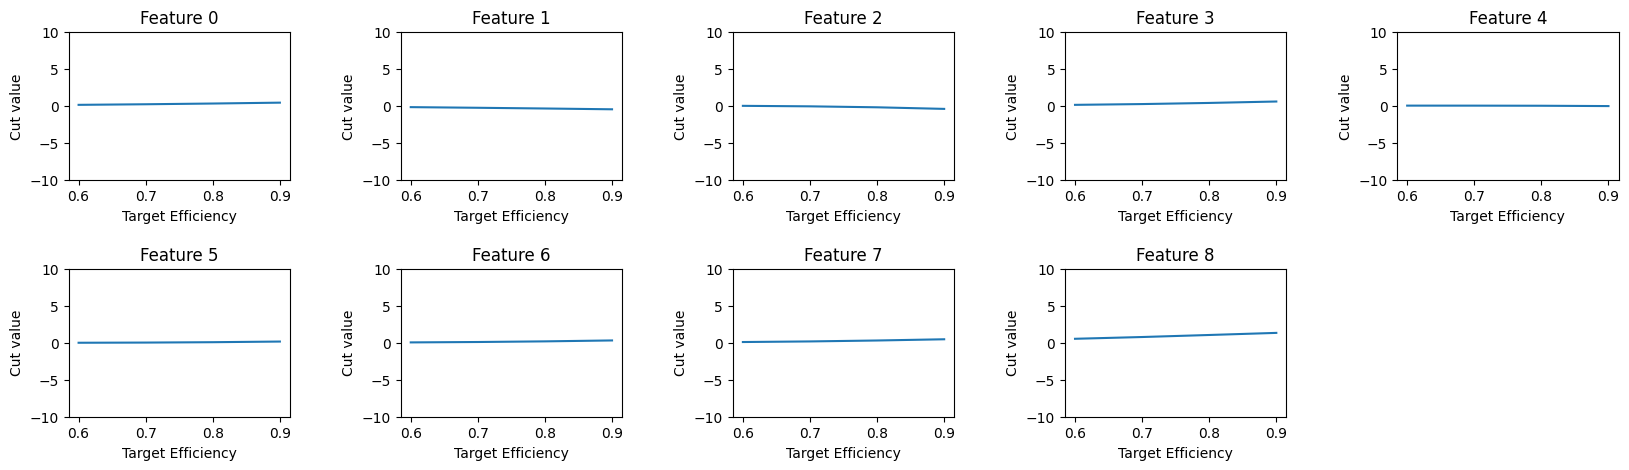

In [29]:
# Distributions of cuts
def plotcuts(net):
    fig = plt.figure(figsize=(20,5))
    fig.tight_layout()
    targeteffics=net.effics
    m=net.features
    
    scaled_cuts=[len(targeteffics)*[0] for i in range(m)]
    for n in range(len(targeteffics)):
        cuts=net.nets[n].get_cuts().detach().numpy()
        for f in range(m):
            cutval=cuts[f]
            scaled_cuts[f][n]=cutval
    for b in range(m):
        ax=fig.add_subplot(2,5,1+b)
        plt.subplots_adjust(hspace=0.6,wspace=0.5)
        ax.plot(targeteffics,scaled_cuts[b])
        ax.set_xlabel(f"Target Efficiency")
        ax.set_ylabel("Cut value")
        ax.set_title(f"Feature {b}")
        ax.set_ylim([-10,10])
plotcuts(net)